<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [63]:
''' Imports '''
''' Is any Data Science notebook complete without pandas and numpy? '''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

''' Base stuff '''
import os
import re

''' Gensim Stuff '''
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora 
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis.gensim

''' Vectorizers '''
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec

''' Pipeline '''
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import SGDClassifier

''' Ensemble Stuff '''
from sklearn.ensemble import RandomForestClassifier

''' KNN '''
from sklearn.neighbors import NearestNeighbors

''' Standard Scaler '''
from sklearn.preprocessing import StandardScaler

''' Named Entity Recognition stuff '''
import nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/Inceptive/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [2]:
import pandas as pd

yelp = pd.read_json('review_sample.json', lines=True)

In [3]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [4]:
df = yelp
df['text'].value_counts(normalize=True)[:50]

didn't think the pho tai was anything special.\nit was really oily.\nbetter than pho so 1.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [5]:
df.isnull().sum()

business_id    0
cool           0
date           0
funny          0
review_id      0
stars          0
text           0
useful         0
user_id        0
dtype: int64

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [6]:
STOPWORDS = set(STOPWORDS).union(set(['the', 'aa', 'aaa', 'aaaahhhs', 'aaasssk', 'aabs', 'aamco', 'aand',
                                      'abc', 'abd', 'abdc', 'good', 'place', 'food', 'great', 'like', 've', 
                                      'ordered', 'restaurant'])) # will update as I go further along


def tokenize(text): 
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

''' Also throwing in some regex cleaning just for good measure '''
def clean(text):
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    return tokens 

In [7]:
# Quick sampe to be sure it works 
tokenize('A Quick sample sentence to check tokenization process. If all goes well, this sentence significantly shortened a a as as  after tokenized.')

['quick',
 'sample',
 'sentence',
 'check',
 'tokenization',
 'process',
 'goes',
 'sentence',
 'significantly',
 'shortened',
 'tokenized']

In [8]:
''' Doing the deed '''
df['tokens'] = df['text'].apply(tokenize, clean)
df['tokens'].head()

0    [beware, fake, fake, fake, small, business, lo...
1    [came, lunch, togo, service, quick, staff, fri...
2    [vegas, dozens, times, stepped, foot, circus, ...
3    [went, night, closed, street, party, best, act...
4    [stars, bad, price, lunch, seniors, pay, eatin...
Name: tokens, dtype: object

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [9]:
''' Going with TfidfVectorizer for this one '''
vect = CountVectorizer()
text = df['tokens'].astype(str)
vect.fit(text)
dtm = vect.transform(text)

In [10]:
# Checking out Feature names
feature_names = vect.get_feature_names()
print(feature_names)

['aaron', 'aback', 'abandoned', 'abby', 'abdominal', 'abend', 'aber', 'aberration', 'abgeht', 'abhorrent', 'abiance', 'abide', 'abiding', 'abigail', 'abilities', 'ability', 'abit', 'ablation', 'able', 'abmormal', 'abnormal', 'abnormally', 'aboard', 'abord', 'abordable', 'abordables', 'abound', 'abraham', 'abrasive', 'abreast', 'abricot', 'abroad', 'abrupt', 'abruptly', 'abruzzo', 'abs', 'abscess', 'absence', 'absent', 'absinthe', 'absolument', 'absolute', 'absolutely', 'absolutley', 'absolutly', 'absolving', 'absorb', 'absorbed', 'absorbs', 'abstains', 'abstecher', 'absurd', 'absurdly', 'abt', 'abu', 'abundance', 'abundant', 'aburi', 'aburiya', 'aburri', 'abuse', 'abusive', 'abut', 'abutment', 'abutments', 'abv', 'abyss', 'abyssinian', 'ac', 'academic', 'academy', 'acadia', 'acai', 'acapella', 'acapulco', 'acceleration', 'accent', 'accented', 'accentuate', 'accept', 'acceptable', 'accepted', 'accepting', 'accepts', 'access', 'accessable', 'accessed', 'accessibility', 'accessible', 'acc

In [11]:
''' Converting spare matrix and putting it into a dataframe and using get_feature_names as the column headers '''
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.head()

# haha nice characters at the end there lol 

,aaron,aback,abandoned,abby,abdominal,abend,aber,aberration,abgeht,abhorrent,...,覺得店家很用心製作,誓約書にサイン,誰も乗車しなくても,豆腐花,車好きさんには,這是一個不錯的選擇,運転しない,運転中も英語で指導があります,食べ物はうまい,餐後點了甜點
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
''' Doing KNN on a Fake review I make and finding the nearest 10 Neighbors '''
nn  = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [13]:
fake_ass_review = ['''
Came here for Lunch with my great great great anny who aboslutely LOVES dumplings along with her Sushi Boat.
We actually hail from Los Angeles where the sushi is fresh so the sushi here in Vegas was alright but it could have 
been better. I personally claim myself as being a true honest to goodness Sushi Afficienado so when I first laid 
eyes on the sushi here i was pretty blown away by the presentation however once I actually started to dig in it became 
very apperent that it would NOT be living up to how good it's presentation was. 

Oh well, any day where you get to eat sushi is a good day in my book. 
Espeically when you get to eat sushi with you great great great GREAT anny. 

OH and the prices are higher than cheech and chong on a Joe rogan Podcast with Elon Musk.

''']

In [14]:
new = vect.transform(fake_ass_review)
nn.kneighbors(new.todense())

(array([[8.30662386, 8.66025404, 8.71779789, 8.77496439, 8.83176087]]),
 array([[3530, 9908, 4192, 4915, 8525]]))

In [15]:
df['text'].iloc[3426]

"This is our go-to AYCE sushi joint in Vegas. Being from Hawaii, we can appreciate the fact that the owners are from Hawaii and the food is authentic. Sushi is great, the plate lunches are great, the desserts are great, poke is great, all of their food is great. You shouldn't even question if you should come here or not."

In [16]:
''' haha nice the nearest review was just like the kind of tone and what not i was going for lol
PLUS it nailed it with the sushi, nice!! '''

' haha nice the nearest review was just like the kind of tone and what not i was going for lol\nPLUS it nailed it with the sushi, nice!! '

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [49]:
features

,business_id,cool,date,funny,review_id,text,useful,user_id,tokens
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fake, small, business, lo..."
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[came, lunch, togo, service, quick, staff, fri..."
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[vegas, dozens, times, stepped, foot, circus, ..."
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[went, night, closed, street, party, best, act..."
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[stars, bad, price, lunch, seniors, pay, eatin..."
5,Db3CfZWrtG33UZSs8Tdlsg,1,2016-10-23 22:43:56,1,nXYV_0joQEMXYAfNyOPsRw,"Tasty, fast casual Latin street food. The men...",1,Gjz2PCbLZ6midk1n_0LaUg,"[tasty, fast, casual, latin, street, menu, ove..."
6,gJhMeq2nVH27tz8LqbD3eQ,0,2013-05-20 19:09:43,0,ZA7SRi6fTRWwpo-B9O72qQ,This show is absolutely amazing!! What an incr...,0,BeKPVuqX-2at4izqVwUFEg,"[absolutely, amazing, incredible, production, ..."
7,Yt5gK4E9NqVa14WNiQdBlQ,0,2018-07-12 01:19:53,0,4_GnHPkyTirzK6onIKO4jw,Came for the Pho and really enjoyed it! We go...,0,PuXpIJzTBQejeBZh9hwynQ,"[came, pho, enjoyed, got, pm, busy, got, serve..."
8,c7WsC8SbUcLyZkREzx9dGA,1,2017-09-27 22:10:26,0,XGGHc7pYgOm5s6SWr8NMXA,Absolutely the most Unique experience in a nai...,0,NVVknS1I51z8wY5NNrJ6vQ,"[absolutely, unique, experience, nail, shop, f..."
9,NSifXpsCRvnsBRqrHF9CJA,0,2015-01-25 08:43:15,0,--e66tyhwCE6eoRmcK2w8g,Wow. I walked in and sat at the bar for 10 min...,2,J7MsJKJDSA5OGo2-Hn7MbA,"[wow, walked, sat, bar, minutes, bartenders, w..."


In [39]:
target.head()

0    1
1    4
2    3
3    1
4    4
Name: stars, dtype: int64

In [58]:
''' I'm totally just throwing up my best model from the which Whisky Kaggle challenge and tweaking from there'''


''' Stretch Goal '''
# Using all columns as supposed to only the Text Reviews
features = df.drop(columns=['stars'])

vect = TfidfVectorizer(stop_words='english')
scaler = StandardScaler(with_mean=False, with_std=False)
sgdc = SGDClassifier(alpha=0.0005, 
                     average=False, 
                     class_weight='balanced',
                     early_stopping=False, 
                     epsilon=0.01, 
                     eta0=0.1, 
                     fit_intercept=True,
                     l1_ratio=0.15, 
                     learning_rate='optimal', 
                     loss='hinge', 
                     max_iter=500,
                     n_iter_no_change=8, 
                     n_jobs=None,  
                     penalty='l2', 
                     power_t=0.5,
                     random_state=69, 
                     shuffle=True, 
                     tol=0.0015, 
                     validation_fraction=0.05,
                     verbose=0, 
                     warm_start=True)

rfc = RandomForestClassifier() 


pipe = Pipeline([('vect', vect), 
               #  ('scaler', scaler),
                 ('clf', sgdc)])
# Fit Pipeline
pipe.fit(df['text'], df['stars'])

# Declaring some parameters to fine tune
parameters = {
    'clf__alpha' : (.0001, .0005, .0007, .001),
    'clf__max_iter' : (100, 500, 1000, 1500, 200)

}

# Instantiating grid Search
grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1)

# Fitting to find the.... best fits
grid_search.fit(df['text'], df['stars'])

# Printing out the best params along with the best accuracy score via grid search
print(grid_search.best_params_, grid_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   43.9s finished


{'clf__alpha': 0.0005, 'clf__max_iter': 100} 0.5998


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [18]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

Learn the vocubalary of the yelp data:

In [19]:
id2word = corpora.Dictionary(df['tokens'])

In [20]:
''' Adding this to do some filtering out '''
id2word.filter_extremes(no_below=.15, no_above=.85)

Create a bag of words representation of the entire corpus

In [21]:
corpus = [id2word.doc2bow(text) for text in df['tokens']]

Your LDA model should be ready for estimation: 

In [22]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 4,
                   passes = 10
                  )

In [23]:
''' Printing out topics cleaned up Version '''

words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()] # Theres that regex wizardry lol
topics = [' '.join(t[0:5]) for t in words]

for id, t in enumerate(topics):
    print(f"----- Topic {id} -----")
    print(t)
    print('\n')

----- Topic 0 -----
chicken delicious best service try


----- Topic 1 -----
service time nice order got


----- Topic 2 -----
service time experience recommend staff


----- Topic 3 -----
time got room told said




Create 1-2 visualizations of the results

In [24]:
''' For Starts, that LDA visualization is... THE MOST DOPE visualization + it helps to really understand 
    whats going on in the data at its core 
'''
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/Users/Inceptive/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.118648  0.006935       1        1  33.086094
3      0.081423 -0.046832       2        1  25.284561
1     -0.019875 -0.030633       3        1  20.850914
2      0.057099  0.070530       4        1  20.778435, topic_info=     Category         Freq          Term        Total  loglift  logprob
43    Default  3428.000000       service  3428.000000  30.0000  30.0000
353   Default  1255.000000     delicious  1255.000000  29.0000  29.0000
1269  Default  1409.000000       chicken  1409.000000  28.0000  28.0000
33    Default  3291.000000          time  3291.000000  27.0000  27.0000
101   Default   932.000000          room   932.000000  26.0000  26.0000
764   Default   582.000000         cream   582.000000  25.0000  25.0000
520   Default   927.000000          told   927.000000  24.0000  24.0000
779   Default   553.000000         sushi   553.000000  23.0000  23.0000
433   Default   753.000000      customer   753.000000  22.0000  22.0000
365   Default   944.000000         fresh   944.000000  21.0000  21.0000
2175  Default   590.000000           car   590.000000  20.0000  20.0000
29    Default  1150.000000          said  1150.000000  19.0000  19.0000
768   Default   483.000000           ice   483.000000  18.0000  18.0000
2205  Default   334.000000  professional   334.000000  17.0000  17.0000
529   Default   891.000000          work   891.000000  16.0000  16.0000
415   Default   784.000000         asked   784.000000  15.0000  15.0000
1457  Default   501.000000        flavor   501.000000  14.0000  14.0000
258   Default  1243.000000    experience  1243.000000  13.0000  13.0000
140   Default   505.000000         fried   505.000000  12.0000  12.0000
8     Default   597.000000        called   597.000000  11.0000  11.0000
343   Default   838.000000        cheese   838.000000  10.0000  10.0000
2690  Default   325.000000         tacos   325.000000   9.0000   9.0000
792   Default   525.000000       friends   525.000000   8.0000   8.0000
394   Default   813.000000         sauce   813.000000   7.0000   7.0000
672   Default   638.000000     excellent   638.000000   6.0000   6.0000
179   Default  1124.000000     recommend  1124.000000   5.0000   5.0000
203   Default   367.000000          hair   367.000000   4.0000   4.0000
339   Default   433.000000         bread   433.000000   3.0000   3.0000
237   Default   558.000000          meat   558.000000   2.0000   2.0000
90    Default  1716.000000          nice  1716.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
933    Topic4   301.442566         happy   688.609070   0.7452  -5.7438
292    Topic4   127.469841         salon   224.646118   1.0046  -6.6045
185    Topic4   197.553802    absolutely   400.050354   0.8657  -6.1664
2554   Topic4   108.316147        showed   181.757156   1.0536  -6.7673
672    Topic4   269.654480     excellent   638.353516   0.7095  -5.8552
3119   Topic4   108.289490          poor   184.445282   1.0387  -6.7676
1429   Topic4   189.547211          week   420.779358   0.7738  -6.2077
573    Topic4   209.132156        family   485.029968   0.7300  -6.1094
472    Topic4   372.409241          know  1183.370850   0.4151  -5.5324
152    Topic4   298.359436         price   850.702881   0.5235  -5.7541
44     Topic4   433.018158         staff  1505.768921   0.3250  -5.3816
333    Topic4   246.684464       awesome   642.362061   0.6142  -5.9443
33     Topic4   701.085144          time  3291.106201   0.0249  -4.8997
728    Topic4   428.578827          love  1590.125610   0.2602  -5.3919
29     Topic4   343.560852          said  1150.388672   0.3628  -5.6130
128    Topic4   380.277740        people  1374.121948   0.2866  -5.5115
119    Topic4   427.927460          best  1838.227417   0.1137  -5.3934
434    Topic4   327.174072           day  1157.746338   0.3075  -5.6619
132    Topic4   260.886047       

In [25]:
''' So this shows more words that are super common but don't tell alot so will remove them via stop words and rerun code'''

# good, place, food, great, like, ve, ordered, restaurant

" So this shows more words that are super common but don't tell alot so will remove them via stop words and rerun code"

' So this shows generally most of the reviews are favoring the higher end,\n    And most of the topics generally include "good, great, etc" \n    So this will likely decrease the amount of topics quite a bit '

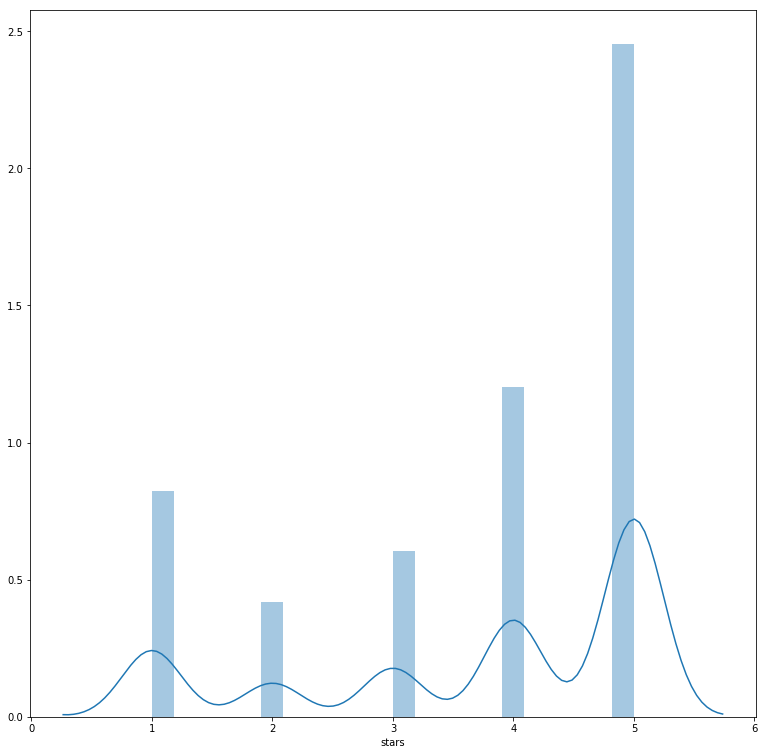

In [67]:
''' Visualizing the distribution of Ratings '''
sns.distplot(df['stars'])

''' So this shows generally most of the reviews are favoring the higher end,
    And most of the topics generally include "good, great, etc" 
    So this will likely decrease the amount of topics quite a bit '''

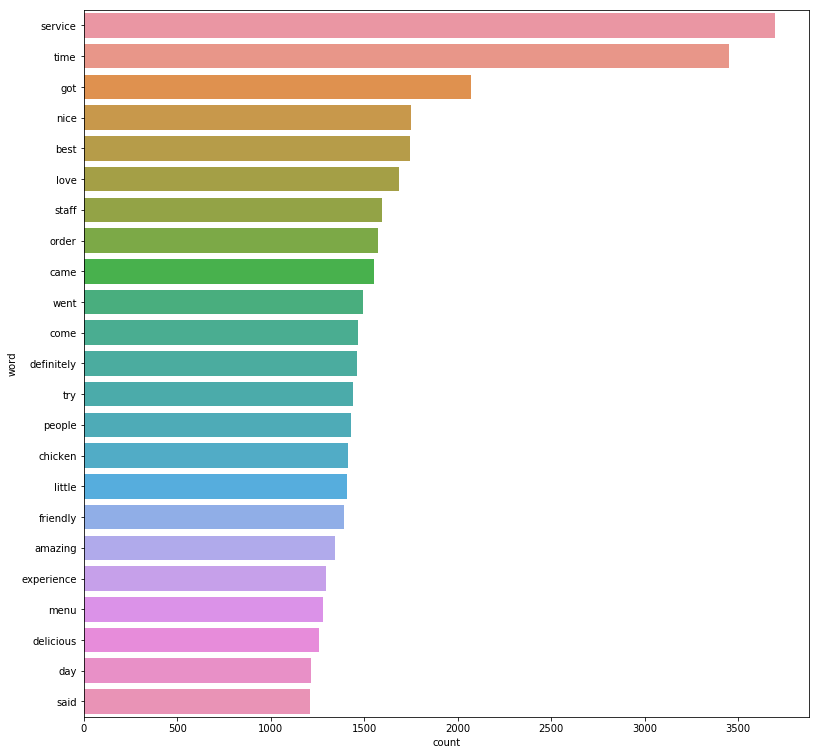

In [66]:
''' Extra Visualization, form Lecture one, Squarify '''

from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')
    
    
wc = count(df['tokens'])

sns.barplot(x='count', y='word', data = (wc[wc['count'] > 1200]))
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 13

## Analysis  

So overall it was very easy to see that this was yelp reviews from restaurants in at least Las Vegas. As you can see in the 2nd visual,
the seaborn distplot, most reviews are generally good of where people were eating(4-5 stars were the majority). There definitely was 
negative reviews but that can be expected of a large sample size, and especially in a place like Vegas where they're just churning people
through the machine 24/7. 
As for topics, they generally revolve around service and taste of the food, as you would exepct of restaurant reviews. the Classification 
portion of this assignment was no where near as accuarate as the Which Whisky(60% vs 97%). But this is real world data, so if we can
predict a rating of a restaurant on yelp using soley NLP and not even the other features, that speaks to just how powerful this tool is
and I still find it fascinating. LDA unbelievably powerful, can't speak highly enough of it. Also The accuracy of KNN was stunning. 
I wrote a really generic yet satirical fake review, and yet, it returned a result that was the exact topic of my satire. It identified that
review such high accuracy it's mind blowing and funny at the same time. 

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)

In [68]:
''' Named Entity Recognition  '''

from nltk import word_tokenize, pos_tag, ne_chunk

text = df['text'].iloc[69]

# Named Entity Recognition on one review
print(ne_chunk(pos_tag(word_tokenize(text))))

LookupError: 
**********************************************************************
  Resource [93mwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('words')
  [0m
  Attempted to load [93mcorpora/words[0m

  Searched in:
    - '/Users/Inceptive/nltk_data'
    - '/Users/Inceptive/anaconda3/nltk_data'
    - '/Users/Inceptive/anaconda3/share/nltk_data'
    - '/Users/Inceptive/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
